

### Source of Paper YOLO V1 :
https://arxiv.org/pdf/1506.02640.pdf

### Source of Paper YOLO V2 :
https://arxiv.org/pdf/1612.08242.pdf

### Source of Paper YOLO V3 :
https://arxiv.org/pdf/1804.02767.pdf

### Source of Paper YOLO V4 :
https://arxiv.org/pdf/2004.10934.pdf

### Slides for Reference :
https://docs.google.com/presentation/d/1aeRvtKG21KHdD5lg6Hgyhx5rPq_ZOsGjG5rJ1HP7BbA/pub?start=false&loop=false&delayms=3000&slide=id.p


# YOLO3

### 1. Bounding box prediction

YOLO2 predicts that bounding boxes use anchor boxes. This network predicts 4 coordinates for each bounding box: tx, ty, tw, and th. (Cx, cy) represents the coordinates of the upper-left corner of the current grid offset from the upper-left corner of the image. Distance, with pw, ph representing the width and height of the prior box (piror), we can get the following formula:

        

During training, a sum of squared error loss is used. True value by said gradient is the true value minus the predicted value: .

YOLO3 uses logistic regression to predict a score for each bounding box. The algorithm only matches an optimal prior box for each truth value.

### 2. Multi-label prediction

Each bounding box may contain multiple types of objects, that is, multi-label prediction. So logistic (sigmoid) is used instead of softmax, because softmax indicates that each box has only one type of object, and sigmoid can predict multi-label classification . So how to use sigmoid for multi-label classification? In fact, a sigmoid classifier is applied to the results of each classification calculation in logits to determine whether the sample belongs to a certain category. During training, a binary cross-entropy loss function is used for class prediction.

### 3. Combine the characteristics of different convolutional layers to extract more fine-grained information and make multi-scale predictions

YOLO3 uses three different scales to predict the boxes. The network uses a similar feature pyramid concept to extract features from different scales. Several new convolutional layers were added to the original basic feature extractor . Finally, a 3-dimensional tensor was used to represent the bounding box, objectness, and class predictions. In COCO, 3 boxes are predicted on each scale, so the tensor is N * N * [3 * (4 + 1 + 80)], which corresponds to 4 bounding boxes, 1 objectness prediction, and 80 class predictions, respectively. . Next, extract the feature map from the previous two layers and upsample it 2 times. Take a feature map from an earlier network and use tandem to merge it with the up-sampled features. This approach allows us to obtain more meaningful semantic information from the up-sampled features and finer-grained information from earlier feature maps. Then add some convolutional layers to process this combined feature map, and finally predict a similar tensor , although it is now twice the size. Perform the same design again to predict the size of the final box. In the past, YOLO had difficulty predicting small objects, but now it has improved significantly through multi-scale prediction.


### 4. Network structure ( DarkNet53 = Darknet19 + ResNet )

Combine the residual thought to extract deeper semantic information.
Continuous 3 × 3 and 1 × 1 convolutional layers are still used.
Prediction is performed on three different scales by upsampling. For example, the 8 * 8 feature map upsampling and the 16 * 16 feature map are added and calculated again, so that smaller objects can be predicted.
A convolutional layer with a step size of 2 is used instead of the pooling layer because the pooling layer will lose information. as the picture shows:


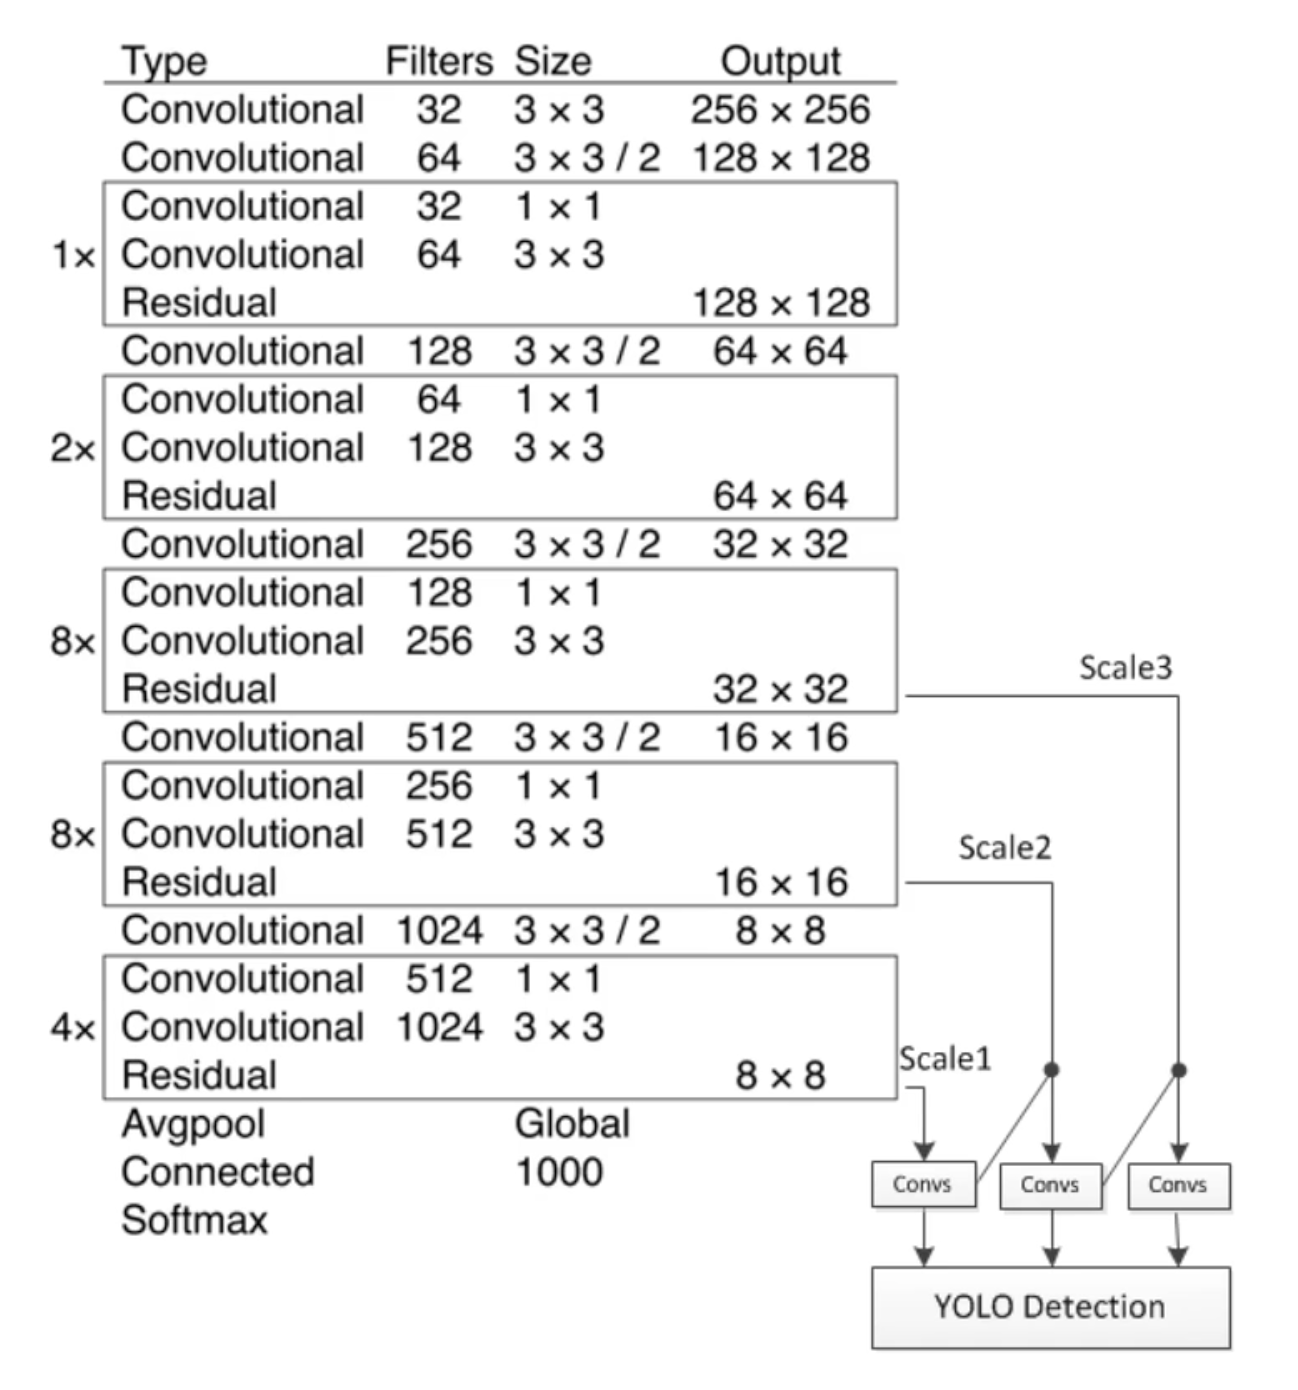

### 5.Predict more targets

YOLO3 still uses k-means clustering to determine template boxes and predict 9 bounding boxes for each grid (only 5 in YOLO2 and only 2 in YOLO1), which can improve recall.

### 6. Loss function

During training, a binary cross-entropy loss function is used for class prediction. The last three terms of the YOLO v2 loss function are squared errors, while YOLO v3 is changed to a cross-entropy error term, which means that YOLO v3's item confidence and separation prediction use a logistic regression algorithm.